## Tweets Disaster 

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np

In [2]:

train_dataset = pd.read_csv('/media/mahfuz/Media/work/tweets_disaster/nlp-getting-started/train.csv', dtype={'id':np.int16, 'target':np.int16})
train_dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [3]:
# Find the null value in the dataset
print(train_dataset.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [4]:
# select the test dataset
test_dataset = pd.read_csv('/media/mahfuz/Media/work/tweets_disaster/nlp-getting-started/test.csv', dtype={'id':np.int16})
test_dataset.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
print('Train shape: ', train_dataset.shape)
print('Test shape: ', test_dataset.shape)
print('Column Names: ', train_dataset.columns)
print(f'Training Memory Usage: {train_dataset.memory_usage().sum()/1024**2:.2f}MB')
print(f'Test Memory Usage: {test_dataset.memory_usage().sum()/1024**2:.2f}MB')

Train shape:  (7613, 5)
Test shape:  (3263, 4)
Column Names:  Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
Training Memory Usage: 0.20MB
Test Memory Usage: 0.08MB


## 1. About Keywords and Location

### Missing Values
The datasets has train and test set have almost same ratio of missing value in keyword and location. 

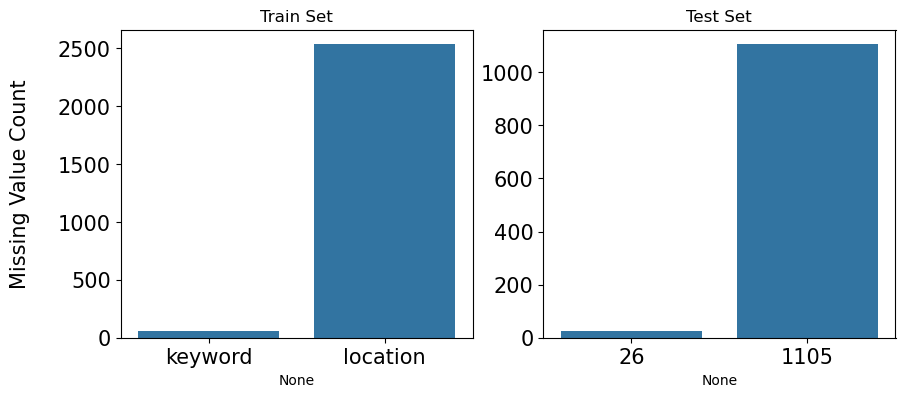

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
missing_column = ['keyword', 'location']

fig, axes = plt.subplots(ncols=2, figsize=(10,4), dpi=100)

# Calculation 
# For train dataset
x0 = train_dataset[missing_column].isnull().sum()
y0 = train_dataset[missing_column].isnull().sum().values
sns.barplot(x=x0.index, y=y0, ax=axes[0])

# For test dataset
x1 = test_dataset[missing_column].isnull().sum()
y1 = test_dataset[missing_column].isnull().sum().values
sns.barplot(x=x1, y=y1, ax=axes[1])

axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)
# For train set
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)

# For test set
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Train Set')
axes[1].set_title('Test Set')

plt.show()
for df in [train_dataset, test_dataset]:
    for col in ['keyword', 'location']:
        df[col] = df[col].fillna(f'no_{col}')

In [6]:
train_dataset_final = train_dataset[['text', 'target']]
train_dataset_final.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_dataset_final.to_csv('final_dataset.csv', index=False)

In [9]:
train_dataset_final.head()

,text,target
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,"13,000 people receive #wildfires evacuation orders in California",1
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [10]:
import matplotlib.pyplot as plt # plot any display
from bs4 import BeautifulSoup # handle html tag
import re
import demoji
def text_primary_processing(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text()

    # Remove urls from the text
    url_pattern = r'(https?://\S+|www\.\S+)'
    text = re.sub(url_pattern, '', text)

    # make the text lowercase 
    text = text.lower()

    # Remove special characters, keeping only alphabetic and spaces
    text = re.sub('[^a-zA-Z\s]', ' ', text)

    # Replace specific unicode spaces with standard spaces and trim
    text = text.replace(u'\xa0', u' ').replace('\u200a', ' ').strip()

    return text

In [12]:
train_dataset_final['text'].apply(text_primary_processing)
train_dataset_final.tail()

/tmp/ipykernel_8947/12905221.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


,text,target
7608,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1
7612,The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d,1


In [13]:
url_pattern = r'(https?://\S+|www\.\S+)'
urls = re.findall(url_pattern, str(train_dataset_final['text']))
print(urls)

['http://t.co/STfMbbZFB5', 'http://t.co/zDtoyd8EbJ', 'http://t.co/YmY4rSkQ3d']


In [14]:
train_dataset_final.iloc[450:465]

,text,target
450,Demi stans really think Heart Attack sold 5/6 million copies ??,0
451,it scares me that there's new versions of nuclear attack warnings like just knowing that governments still prepare for them,1
452,ISIL claims suicide bombing at Saudi mosque that killed at least 15 http://t.co/Y8IcF89H6w http://t.co/t9MSnZV1Kb,1
453,@DatTomm the funniest part about that twitter is the feminists that try to attack it 4Head,0
454,Horrific attack on wife by muslim in Italy http://t.co/nY3l1oRZQb LiveLeak #News,1
455,Ûª93 blasts accused Yeda Yakub dies in Karachi of heart attack http://t.co/mfKqyxd8XG #Mumbai,1
456,@etribune US Drone attack kills 4-suspected militants in North Waziristan @AceBreakingNews https://t.co/jB038rdFAK,1
457,Suspect in latest theater attack had psychological issues http://t.co/3huhZxliiG,1
458,Militants attack police post in Udhampur; 2 SPOs injured | LiveMint http://t.co/Rptouz2iJs | http://t.co/69mLhfefhr #AllTheNews,1
459,BREAKING: Obama Officials GAVE Muslim Terrorist the Weapon Used in Texas Attack http://t.co/qi8QDw5dFG,1


In [24]:
url_pattern = r'http[s]?://\S+'
urls = re.findall(url_pattern, str(train_dataset_final['text']))
print(urls)

['http://t.co/STfMbbZFB5', 'http://t.co/zDtoyd8EbJ', 'http://t.co/YmY4rSkQ3d']


In [15]:
train_dataset_final.dtypes

text      object
target     int64
dtype: object

In [17]:
train_dataset_final.tail()

,text,target
7608,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1
7612,The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d,1
